In [8]:
import os
import sys
sys.path.append(['..'])

import time
import carla
import numpy as np
import math
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import ipyvolume as ipv
from scipy.interpolate import splprep, splev
from scipy.ndimage import gaussian_filter1d

In [9]:
DATA_PATH = '../data/spawn_points'
TRACKS = ['circut_spa', 'RaceTrack', 'RaceTrack2']

track_DF = pd.read_csv(f'{DATA_PATH}/{TRACKS[1]}.csv')

# Plan na notebook
* Określamy kierunki pomiędzy nimi (oryginalnymi punktami)
* Wybieramy punkty które mają być wyżej/niżej
* Wypłaszczamy je, lub wyrównujemy -> interpolacja liniowa między skrajnie wysokim i niskim
* Testujemy spawnując auto po drodze
* zapisujemy jako csv

# W programie
* Obrobione pliki program będzie zaczytywał licząc kierunki ad hoc. Wyppłaszczanie -> stopnie zamienić na radiany czy coś i wtedy wypłaszczać.


 

### Określenie kierunków i zapis do CSV

In [10]:
x = track_DF['x'].values
y = track_DF['y'].values
z = track_DF['z'].values
#okay = np.where(np.abs(np.diff(x)) + np.abs(np.diff(y)) > 0)
#xp = np.r_[x[okay], x[-1], x[0]]
#yp = np.r_[y[okay], y[-1], y[0]]

#jump = np.sqrt(np.diff(xp)**2 + np.diff(yp)**2)
#smooth_jump = gaussian_filter1d(jump, 5, mode='wrap')  # window of size 5 is arbitrary
#limit = 2*np.median(smooth_jump)    # factor 2 is arbitrary
#xn, yn = xp[:-1], yp[:-1]
#xn = xn[(jump > 0) & (smooth_jump < limit)]
#yn = yn[(jump > 0) & (smooth_jump < limit)]

pts_2D = np.array([x, y])
pts_3D = np.array([x, y, z])
#pts_2D = np.array([xn, yn])
tck, u = splprep(pts_3D, u=None, s=1.5, per=1, k=2)
u_new = np.linspace(u.min(), u.max(), 10000)
x_new, y_new, z_new = splev(u_new, tck, der=0)
pts_3D = np.array([x_new, y_new, z_new])

/home/user/miniconda/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][183]=x[0][0]
  (i, m, i)))
/home/user/miniconda/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[1][183]=x[1][0]
  (i, m, i)))
/home/user/miniconda/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[2][183]=x[2][0]
  (i, m, i)))


# Testowanie - spawnowanie

In [11]:
df = pd.DataFrame(pts_3D.T, columns =['x','y','z'])

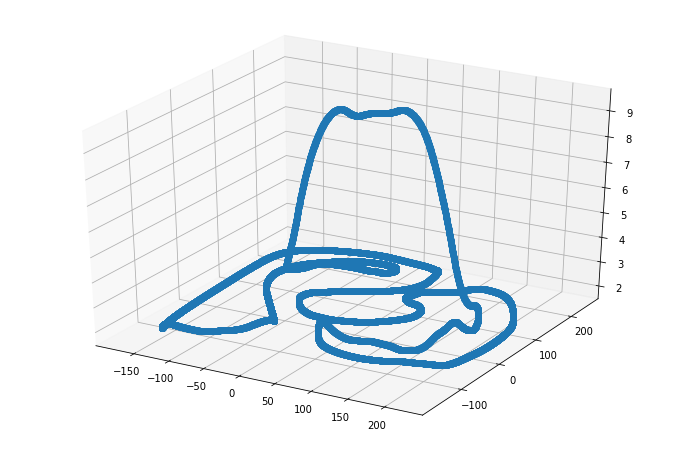

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# plt.plot(xp, yp, '-o')
# plt.show()
# plt.scatter(x, y z, s=7., color='red')
# plt.plot(x_new, y_new, z_new, '-o')
df_cut = track_DF[59:78]
df_cut = df[:]

plt.plot(df_cut['x'], df_cut['y'], df_cut['z'], '-o')
plt.show()

In [13]:
fig = ipv.figure()
plot = ipv.plot(df_cut['x'], df_cut['y'], df_cut['z'])
ipv.zlim(0, 50)
ipv.show()